# Credit Card Approval Applications

**Authors**: Thi-Thu-Thuy Trinh

**Key objective**: Build an automatic Credit Card Approval Predictor using Machine Learning techniques

We will adopt the **CRISP-DM** process to achieve the objective :

1.   ***Business Understanding***: Specify business needs for the Machine Learning application
2.   ***Data Understanding***: Investigation what data is available and their attributes.
3.   ***Data Preparing***: Preprocess dataset to ensure proper input for machine learning models
4.   ***Modeling***: Select appropriate models
5.   ***Evaluation***: Fit and Evaluate all models for the best model and then Tune hyper-parameters of the best model
7.   ***Deployement***: Deploy the best model so that stakeholders can assess the result

## 1. Business Understanding

<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>


## 2. Data Understanding

<p>We'll use the <a href="https://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository.

Let's first load the data and have a first view of the raw dataset

In [ ]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv('https://raw.githubusercontent.com/thuytrinht4/predict_cc_approvals/master/datasets/cc_approvals.data', 
                      header=None)

# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy. We can still make prediction model using the anoymized data.

However, in order to have a better understanding data and working progress, we can assign probable names to each of the features based on the characteristic of their values. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. 

We can map these features with respect to the columns in the raw data. This gives us a pretty good starting point   </p>

In [ ]:
# add headers to the raw data
headers = ["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income", "ApprovalStatus"]
cc_apps.columns = headers
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


Now that we have all the features names, we can put together data description for the dataset:

**Attribute Information**:

*   **Gender**: b, a. 
*   **Age**: continuous.  
*   **Debt**: continuous. 
*   **Married**: u, y, l, t. 
*   **BankCustomer**: g, p, gg. 
*   **EducationLevel**: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
*   **Ethnicity**: v, h, bb, j, n, z, dd, ff, o. 
*   **YearsEmployed**: continuous. 
*   **PriorDefault**: t, f. 
*   **Employed**: t, f. 
*   **CreditScore**: continuous. 
*   **DriversLicense**: t, f. 
*   **Citizen**: g, p, s. 
*   **ZipCode**: continuous. 
*   **Income**: continuous. 
*   **ApprovalStatus**: +,- (class attribute)

## 3. Data Prepararing

<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

In [ ]:
# Print DataFrame info of dataset
cc_apps_info = cc_apps.info()
print(cc_apps_info)

# Print DataFrame statistics of dataset
cc_apps_stats = cc_apps.describe()
print(cc_apps_stats)

# look at last few lines of data for missing values in the dataset
cc_apps.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None
             Deb

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


<p>After initial inspection, we can outline several issues that need addressing, including:</p>

1.   Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features `Debt`, `YearsEmployed`, `CreditScore` and `Income` contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.
2.   The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
3.   Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output of the second task.

### 3.1. Handle the missing values (part i) - replace special missing values by NAN

<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [ ]:
# Import numpy
import numpy as np

# Count the number of NaNs in the datasets before Replacing "?"
print("Count the number of NaNs in the datasets BEFORE Replacing '?' with NA")
print(cc_apps.isnull().sum())

# Replace the '?'s with NaN in the train and test sets
cc_apps = cc_apps.replace('?', np.nan)

# Count the number of NaNs in the datasets after Replacing "?"
print("=======================================")
print("Count the number of NaNs in the datasets AFTER Replacing '?' with NA")
print(cc_apps.isnull().sum())

Count the number of NaNs in the datasets BEFORE Replacing '?' with NA
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64
Count the number of NaNs in the datasets AFTER Replacing '?' with NA
Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64


After the replacement, we can see that 7 features are now having missing values, which are `Gender`, `Age`, `Married`, `BankCustomer`, `EducationLevel`, `Ethnicity` and `ZipCode`. 

### 3.2. Correct datatype: Convert string to numeric

From data description, we can see that some of the features that are supposed to numerical (continuous) form, but has become "object" form. This might happen after the data loading and converting process. 

In [ ]:
numeric_feats = ["Age", "Debt", "YearsEmployed", "CreditScore", "ZipCode", "Income"]

# convert to numeric if not currently in numeric form
for col in numeric_feats:
  if cc_apps[col].dtype == "object":
      cc_apps[col] = pd.to_numeric(cc_apps[col])

cc_apps[numeric_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            678 non-null    float64
 1   Debt           690 non-null    float64
 2   YearsEmployed  690 non-null    float64
 3   CreditScore    690 non-null    int64  
 4   ZipCode        677 non-null    float64
 5   Income         690 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 32.5 KB


Now all numeric features are having correct dtype.

### 3.3. Handle the missing values (part ii) - Impute by the mean
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as Linear Discriminant Analysis (LDA). </p>
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [ ]:
# Count the number of NaNs in the datasets before mean imputation
print("Count the number of NaNs in the datasets before mean imputation")
print(cc_apps.isnull().sum())

# Impute the missing values with mean imputation
for col in numeric_feats:
  cc_apps[col].fillna(cc_apps[col].mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print("=======================================")
print("Count the number of NaNs in the datasets after mean imputation")
print(cc_apps.isnull().sum())

Count the number of NaNs in the datasets before mean imputation
Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64
Count the number of NaNs in the datasets after mean imputation
Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64


We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns `Gender`, `Married`, `BankCustomer`, `EducationLevel` and `Ethnicity`. All of these columns contain non-numeric data and this is why the mean imputation strategy would not work here. This needs a different treatment. Next section is going to deal with this task.

### 3.4. Handle the missing values (part iii) - replace categorical data with the mode

We are going to impute these missing values with the **most frequent values** as present in the respective columns. This is good practice when it comes to imputing missing values for categorical data in general.

In [ ]:
# Iterate over each column of cc_apps_train
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
      print(col, "unique values: ", cc_apps[col].unique(), "mode: ", cc_apps[col].mode()[0], "missing: ", cc_apps[col].isnull().sum())
      # Impute with the most frequent value
      cc_apps[col] = cc_apps[col].fillna(cc_apps[col].mode()[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isnull().sum())

Gender unique values:  ['b' 'a' nan] mode:  b missing:  12
Married unique values:  ['u' 'y' nan 'l'] mode:  u missing:  6
BankCustomer unique values:  ['g' 'p' nan 'gg'] mode:  g missing:  6
EducationLevel unique values:  ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan] mode:  c missing:  9
Ethnicity unique values:  ['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n'] mode:  v missing:  9
PriorDefault unique values:  ['t' 'f'] mode:  t missing:  0
Employed unique values:  ['t' 'f'] mode:  f missing:  0
DriversLicense unique values:  ['f' 't'] mode:  f missing:  0
Citizen unique values:  ['g' 's' 'p'] mode:  g missing:  0
ApprovalStatus unique values:  ['+' '-'] mode:  - missing:  0
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
A

Now, there is no missing values in the dataset

### 3.5. Remove Irrelevant features
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Remove irrelevant features.</li>
<li>Convert the non-numeric data into numeric.</li>
<li>Scale the feature values to a uniform range.</li>
</ol>

<p>First, we will remove features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. To get a better sense, we can measure their <a href="https://realpython.com/numpy-scipy-pandas-correlation-python/">statistical correlation</a> to the labels of the dataset. But this is out of scope for this project. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as <em>feature selection</em>. </p>

In [ ]:
# Drop the features 11 and 13
print("Data shape before dropping: ", cc_apps.shape)
cc_apps.drop(columns=["DriversLicense", "ZipCode"], inplace=True)
print("Data shape after dropping: ", cc_apps.shape)

Data shape before dropping:  (690, 16)
Data shape after dropping:  (690, 14)


### 3.6. Encoding Categorical Data

<p>Second, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. 

We will do this by using two modules for this task:

1.   <code>OneHotEncoder()</code> module from <code>category_encoders</code> library
2.   <code>LabelEncoder()</code> module from <code>sklearn</code> library.</p>

In [ ]:
# install and import encoding modules
!pip install category_encoders
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

     |████████████████████████████████| 86 kB 3.2 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Encode Norminal Categorical Data
normal_feats = ["Married", "BankCustomer", "Ethnicity", "Citizen"]

# Use OnehotEncoding to do the numeric transformation
encoder=OneHotEncoder(cols=normal_feats,handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Fit and transform Data
cc_apps = encoder.fit_transform(cc_apps)
cc_apps.head()

,Gender,Age,Debt,Married_u,Married_y,Married_l,BankCustomer_g,BankCustomer_p,BankCustomer_gg,EducationLevel,...,Ethnicity_n,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen_g,Citizen_s,Citizen_p,Income,ApprovalStatus
0,b,30.83,0.000,1.0,0.0,0.0,1.0,0.0,0.0,w,...,0.0,1.25,t,t,1,1.0,0.0,0.0,0,+
1,a,58.67,4.460,1.0,0.0,0.0,1.0,0.0,0.0,q,...,0.0,3.04,t,t,6,1.0,0.0,0.0,560,+
2,a,24.50,0.500,1.0,0.0,0.0,1.0,0.0,0.0,q,...,0.0,1.50,t,f,0,1.0,0.0,0.0,824,+
3,b,27.83,1.540,1.0,0.0,0.0,1.0,0.0,0.0,w,...,0.0,3.75,t,t,5,1.0,0.0,0.0,3,+
4,b,20.17,5.625,1.0,0.0,0.0,1.0,0.0,0.0,w,...,0.0,1.71,t,f,0,0.0,1.0,0.0,0,+


In [ ]:
# Encode Ordinal Categorical Data
binary_feats = ["Gender", "PriorDefault", "Employed"]
ordinal_feats = ["EducationLevel"]

# Instantiate LabelEncoder
Encoder = LabelEncoder()

# Iterate over all Ordinal data and apply encoding
for col in (ordinal_feats+binary_feats):
  print(col, "\n    Unique values: ", cc_apps[col].unique())
  # Use LabelEncoder to do the numeric transformation
  cc_apps[col]=Encoder.fit_transform(cc_apps[col])
  print(" => Encoded value: ", cc_apps[col].unique())

cc_apps.head()

EducationLevel 
    Unique values:  ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
 => Encoded value:  [12 10  9 11  2  8  1  3 13  6  4  0  5  7]
Gender 
    Unique values:  ['b' 'a']
 => Encoded value:  [1 0]
PriorDefault 
    Unique values:  ['t' 'f']
 => Encoded value:  [1 0]
Employed 
    Unique values:  ['t' 'f']
 => Encoded value:  [1 0]


,Gender,Age,Debt,Married_u,Married_y,Married_l,BankCustomer_g,BankCustomer_p,BankCustomer_gg,EducationLevel,...,Ethnicity_n,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen_g,Citizen_s,Citizen_p,Income,ApprovalStatus
0,1,30.83,0.000,1.0,0.0,0.0,1.0,0.0,0.0,12,...,0.0,1.25,1,1,1,1.0,0.0,0.0,0,+
1,0,58.67,4.460,1.0,0.0,0.0,1.0,0.0,0.0,10,...,0.0,3.04,1,1,6,1.0,0.0,0.0,560,+
2,0,24.50,0.500,1.0,0.0,0.0,1.0,0.0,0.0,10,...,0.0,1.50,1,0,0,1.0,0.0,0.0,824,+
3,1,27.83,1.540,1.0,0.0,0.0,1.0,0.0,0.0,12,...,0.0,3.75,1,1,5,1.0,0.0,0.0,3,+
4,1,20.17,5.625,1.0,0.0,0.0,1.0,0.0,0.0,12,...,0.0,1.71,1,0,0,0.0,1.0,0.0,0,+


### 3.7. Segregate features and labels into separate variables

In [ ]:
# Segregate features and labels into separate variables
X = cc_apps.drop("ApprovalStatus",axis=1)
y = cc_apps["ApprovalStatus"]

feature_names = list(X.columns)
# encode y values
# encode 1 for Accept (or +) and 0 if Denied (or -)
y = y.apply(lambda x: 1 if x =="+" else 0)

### 3.8. Rescale data
<p>Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

## 4. Modelling

Essentially, predicting if a credit card application will be approved or not is a **classification** task.

### 4.1. Baseline Model

According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>

<p>This gives us a benchmark. Since more applications were denied than were approved, our baseline model will predict that all applications were denied. This simple model would be correct 55.5% of the time. Our models have to be more accurate than 55.5% to add value to the business.</p>

0    383
1    307
Name: ApprovalStatus, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


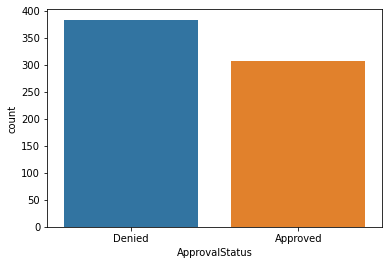

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# view frequency of occurance for each of the class in target variable
print(y.value_counts())
# plot the no of yes's and no's
g = sns.countplot(y)
g.set_xticklabels(['Denied', 'Approved'])
plt.show()

### 4.2. Model Selection and Initialisation

<p>Which model should we pick? </p>

Since we have a binary classification problem. There are several models for classification tasks. 
Here, we will try 3 models:


1.   Naive Bayes
2.   Logistic Regression
3.   Decision Tree

In [ ]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# initialise models
def get_models():
  models = dict() 
  models['bayes'] = GaussianNB()
  models['lg'] = LogisticRegression()
  models['dt'] = DecisionTreeClassifier(criterion='entropy')
  return models

models=get_models()
models.items()

dict_items([('bayes', GaussianNB()), ('lg', LogisticRegression()), ('dt', DecisionTreeClassifier(criterion='entropy'))])

## 5. Evaluation

### 5.1. Training models and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is important to see if our machine learning model is equally capable of predicting approved and denied status, in line with the frequency of these labels in our original dataset. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [ ]:
# import metrics and model_selection modules
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, precision_score
from sklearn.model_selection import train_test_split

In [ ]:
# evaluate the model using Monte Carlo sampling 
def evaluate_model(model, X, y):
  n_trials = 200
  accuracy = [] ### Blank vector
  recall = []
  precision = []
  for i in range(n_trials):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=i)# split dataset
    model = model.fit(X_train,y_train) # fit the model
    y_pred = model.predict(X_test) # predict
    # compute accuracy
    a = accuracy_score(y_test,y_pred) # compute accuracy
    accuracy.append(a) # append accuracy
    # compute recall_score
    r=recall_score(y_test,y_pred)
    recall.append(r)
    # compute precision_score
    pre=precision_score(y_test,y_pred)
    precision.append(pre)
  
  return {'accuracy': accuracy, 'recall': recall, 'precision': precision}

In [ ]:
# evaluate the models and store results
names = list()
mean_acc, mean_recall, mean_precision = list(), list(), list()
std_acc, std_recall, std_precision = list(), list(), list()
for name, model in models.items():
  results = evaluate_model(model, X, y)
  accuracy = results['accuracy']
  recall   = results['recall']
  precision = results['precision']
  
  names.append(name)

  mean_acc.append(np.mean(accuracy))
  std_acc.append(np.std(accuracy))
  mean_recall.append(np.mean(recall))
  std_recall.append(np.std(recall))
  mean_precision.append(np.mean(precision))
  std_precision.append(np.std(precision))  

res_summary = pd.DataFrame(list(zip(mean_acc, std_acc, 
                                    mean_recall, std_recall, 
                                    mean_precision, std_precision)),
                           index=names,
                           columns=['mean_acc', 'std_acc',
                                    'mean_recall', 'std_recall', 
                                    'mean_precision', 'std_precision'])
res_summary

,mean_acc,std_acc,mean_recall,std_recall,mean_precision,std_precision
bayes,0.668961,0.056489,0.324374,0.177852,0.860187,0.081522
lg,0.864010,0.021973,0.897659,0.033154,0.815846,0.037305
dt,0.814710,0.028909,0.788894,0.045414,0.794453,0.046275


**Logistic Regression** is the best model overall since it has the highest average accuracy of 0.86 and higest average recall of 0.90 and second highest average precision of 0.82. Standard deviation on those result are the lowest and therefore most reliable result.

**Naive Bayes**, on the other hand, has the highest average precision of 0.86. However its average recall and accuracy are particularly low, at 0.32 and 0.67 respectively. This means that NB just predict "Deny" for most of the applications, which is not really useful in pratice. 

### 5.2. Tunning Model

#### 5.2.1. Grid searching and making the model perform better
<p>Our model was pretty good! </p>

<p>But we can still improve it. We can perform a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>

*   `tol`: the level of error tollerance when running optimisation when training the model to best-fit the data 
*   `max_ite`: the maximum number of iterations before stopping the search for the best parameters. 


In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

#### 5.2.2. Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>

Finally, we'll store the best-achieved score and the respective best parameters as **best_model** object. 

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Fit grid_model to the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=50)
grid_model_result = grid_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(X_test,y_test))

Best: 0.859321 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.8792270531400966


After tunning, our best model achieve 87.9% accuracy, which has improved by nearly 2% from 86.4% mean accuracy in the previous section.

Afterall, we have a final model which is way above the Baseline model accuracy of 55.5%. 

This is a very encouraging result!

We will deploy this **best_model** in the deployement phase

## 6. Deployment

### 6.1. Create Pipeline for deployement

In [ ]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/thuytrinht4/predict_cc_approvals/master/datasets/cc_approvals.data', 
                      header=None)
raw_df.columns = headers
raw_df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
all_feats = ["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income"]
numeric_feats = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
norminal_feats = ['Married', 'BankCustomer', 'Ethnicity', 'Citizen']
binary_feats = ['Gender', 'PriorDefault', 'Employed']
ordinal_feats = ['EducationLevel']
label_ec_feats = binary_feats + ordinal_feats

X = raw_df[all_feats]
y = raw_df["ApprovalStatus"]

# encode 1 for Accept (or +) and 0 if Denied (or -)
y = y.apply(lambda x: 1 if x =="+" else 0)

In [ ]:
# import the BaseEstimator
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# pre-processsing steps
# Replace "?" value with NAN
# preprocess numeric variables
# preprocess norminal variables
# preprocess binary and ordinal variables

# define custom transformer
class ReplaceSpecialChar(BaseEstimator):
  def fit(self, x, y=None):
    return self
    
  def transform(self, X):
    X = X.replace("?", np.nan)
    return X

class ImputeNumeric(BaseEstimator):
  def fit(self, x, y=None):
    return self

  def transform(self, X):
    for col in X.columns:
      # convert string to numeric
      if X[col].dtype == "object":
        X[col] = pd.to_numeric(X[col])
      # impute missing values by the mean
      X[col].fillna(X[col].mean(), inplace=True)
    return X

# define transformer Pipeline for each of the datatype
numeric_transformer = Pipeline(
    steps=[("remove?", ReplaceSpecialChar()), 
           ("imputer", ImputeNumeric()), 
           ("scaler", MinMaxScaler(feature_range=(0,1)))]
           )

norminal_transformer = Pipeline(
    steps=[("remove?", ReplaceSpecialChar()),
           ("imputer", SimpleImputer(strategy='most_frequent')), 
           ("onehot", OneHotEncoder(handle_unknown='ignore'))]
           )

ordinal_transformer = Pipeline(
    steps=[("remove?", ReplaceSpecialChar()),
           ("imputer", SimpleImputer(strategy='most_frequent')), 
           ("labelec", OrdinalEncoder()),
           ("scaler", MinMaxScaler(feature_range=(0,1)))]
           )

# define preprocessing pipeline
preprocessor = ColumnTransformer(remainder='drop',
                                transformers=[('numeric_transformer', numeric_transformer, numeric_feats),
                                              ('norminal_transformer', norminal_transformer, norminal_feats),
                                              ('ordinal_transformer', ordinal_transformer, ordinal_feats+binary_feats)]
                                )


In [ ]:
# Define the Pipeline
"""
Step1: preprocessing
Step2: Train a best_model
"""
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', best_model)
                                 ])
# fit the pipeline with the whole dataset
model_pipeline.fit(X,y)

# predict target values
print(model_pipeline.predict(X.head(1)))

# pipeline score
print(classification_report(y, model_pipeline.predict(X)))

[1]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       383
           1       0.82      0.91      0.86       307

    accuracy                           0.87       690
   macro avg       0.87      0.87      0.87       690
weighted avg       0.87      0.87      0.87       690



### 6.2. Deploy

In [ ]:
# deployment
def app_pred(app_inputs, model = model_pipeline):
  # transformed_inputs = model_pipeline.fit_transform(app_inputs)
  pred = model.predict(app_inputs)

  # print result
  for count, res in enumerate(pred):
    print("Application No.", count+1)
    if res == 0:
      print("Result: Denied!\n")
    elif res == 1:
      print("Result: Approved!\n")
    else:
      print("Error!")
  
  return pred

### 6.3. Testing

In [ ]:
# test predicting 1 input at a time
test1 = raw_df.tail(1)
test1.drop(["ApprovalStatus"], axis=1)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0


In [ ]:
app_pred(test1)

Application No. 1
Result: Denied!



array([0])

In [ ]:
# test predicting customized input
# inputing values below
Gender = 'a'          # binary: 'b' or 'a' 
Age =  47             # int range(10, 100)
Debt = 3              # continuous range(0, 30)
Married = 'u'         # categorical: 'u', 'y', 'l' or 't'
BankCustomer = 'g'    # categorical: 'g', 'p' or 'gg'
EducationLevel = 'x'  # categorical: 'c, 'd', 'cc', 'i', 'j', 'k', 'm', 'r', 'q', 'w', 'x', 'e', 'aa', 'ff'
Ethnicity = 'v'       # categorical: v, h, bb, j, n, z, dd, ff, o.
YearsEmployed = 13     # continuous range(0, 30)
PriorDefault = 't'    # binary: 't' or 'f'
Employed = 't'        # binary: 't' or 'f'
CreditScore = 10       # continuous range(0, 100)
DriversLicense = 't'  # binary: 't' or 'f'
Citizen = 'g'         # categorical: 'g', 'p' or 's'
ZipCode = 1519       # continuous: range(0, 2000)
Income = 1004         # continous: range(0, 100000)

In [ ]:
# convert custom input into pd DataFrame
custom_input = pd.DataFrame([Gender, Age, Debt, Married, BankCustomer, EducationLevel,
                             Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore,
                             DriversLicense, Citizen, ZipCode, Income],
                            index = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
                                       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
                                       'DriversLicense', 'Citizen', 'ZipCode', 'Income'])
custom_input = custom_input.transpose()

# parse custom_input into predicting model
app_pred(custom_input)

Application No. 1
Result: Approved!



array([1])

In [ ]:
# test predicting multiple inputs at a time
test2 = raw_df.sample(10)
test2.drop(["ApprovalStatus"], axis=1)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
319,b,36.75,0.125,y,p,c,v,1.500,f,f,0,t,g,00232,113
634,a,23.75,0.710,u,g,w,v,0.250,f,t,1,t,g,00240,4
26,a,47.00,13.000,u,g,i,bb,5.165,t,t,9,t,g,00000,0
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0
116,b,37.75,7.000,u,g,q,h,11.500,t,t,7,t,g,00300,5
231,a,47.42,3.000,u,g,x,v,13.875,t,t,2,t,g,00519,1704
73,b,44.25,0.500,u,g,m,v,10.750,t,f,0,f,s,00400,0
183,a,57.08,19.500,u,g,c,v,5.500,t,t,7,f,g,00000,3000
218,b,53.92,9.625,u,g,e,v,8.665,t,t,5,f,g,00000,0
50,a,25.75,0.500,u,g,c,h,0.875,t,f,0,t,g,00491,0


In [ ]:
import time
start_time = time.time()
app_pred(test2)
end_time = time.time()
print(f"Total processing time: {round(end_time-start_time, 5)} seconds for {test2.shape[0]} applications")

Application No. 1
Result: Denied!

Application No. 2
Result: Denied!

Application No. 3
Result: Approved!

Application No. 4
Result: Denied!

Application No. 5
Result: Approved!

Application No. 6
Result: Approved!

Application No. 7
Result: Approved!

Application No. 8
Result: Approved!

Application No. 9
Result: Approved!

Application No. 10
Result: Approved!

Total processing time: 0.08236 seconds for 10 applications


### 6.4. Reasoning

Still Not impressed yet?

Probaly because we have no idea what contributed to this final decision of Denying or Approving the application. 

We can do better by specifying the probability of the given class and the reasons for it. 

This is sometimes refered as **Explainable AI**, a very hot and releavant topics in Machine Learning

In [ ]:
import math
from tabulate import tabulate

In [ ]:
feat_names = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income',
                 'Married_l', 'Married_u', 'Married_y', 'BankCustomer_g', 'BankCustomer_gg', 'BankCustomer_p',
                 'Ethnicity_bb', 'Ethnicity_dd', 'Ethnicity_ff', 'Ethnicity_h', 'Ethnicity_j', 'Ethnicity_n', 'Ethnicity_o', 'Ethnicity_v', 'Ethnicity_z', 'Citizen_g', 'Citizen_p', 'Citizen_s',
                 'EducationLevel', 'Gender', 'PriorDefault', 'Employed']

def get_feat_importance(app_input, model=model_pipeline, n_feats = 5, print_res=True):
  # best model coefficients
  w0 = model_pipeline.named_steps['classifier'].intercept_[0]
  w = model_pipeline.named_steps['classifier'].coef_[0]

  # compute feature importance
  feature_importance = pd.DataFrame(feat_names, columns = ["feature"])
  feature_importance["transformed_val"] = model_pipeline.named_steps["preprocessor"].transform(app_input)[0]
  feature_importance["importance"] = pow(math.e, w)
  feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

  # switch encoding of binary variables, for better interpretation
  feature_importance["value"] = feature_importance["transformed_val"]
  feature_importance.loc[feature_importance['feature'].isin(['PriorDefault']), "value"] = 1 - feature_importance.loc[feature_importance['feature'].isin(['PriorDefault']), "value"]
  # reverse transform numeric features
  for feat in numeric_feats:
    feature_importance.loc[feature_importance["feature"]==feat, "value"] = app_input.loc[:, feat].values[0]

  feature_importance.set_index('feature', inplace=True)

  if print_res:
    print(f"Top-{n_feats} Important Features")
    print(tabulate(feature_importance[["value"]].head(n_feats)), "\n")

  return feature_importance

def app_pred_2(app_inputs, model = model_pipeline):
  # predicting result and compute probability
  pred = model.predict(app_inputs)
  pred_proba = model_pipeline.predict_proba(app_inputs)

  # print result
  for count, res in enumerate(pred):
    print("Application No.", count+1)
    if res == 0:
      proba = pred_proba[count][0]
      print(f"Result: Denied! ({round(100*proba,1)}% confidence)")
    elif res == 1:
      proba = pred_proba[count][1]
      print(f"Result: Approved! ({round(100*proba,1)}% confidence)")
    else:
      print("Error!")

    # print feature important
    if count > 0:
      get_feat_importance(app_inputs.iloc[[count],:])
    else:
      get_feat_importance(app_inputs)
  
  return (pred, pred_proba)

In [ ]:
# test on running on 1 input at a time
app_pred_2(custom_input)

Application No. 1
Result: Approved! (93.1% confidence)
Top-5 Important Features
-------------  --
PriorDefault    0
Citizen_p       0
Employed        1
CreditScore    10
YearsEmployed  13
-------------  -- 



(array([1]), array([[0.06928279, 0.93071721]]))

In [ ]:
# test on running on multiple inputs at a time
app_pred_2(test2)

Application No. 1
Result: Denied! (97.2% confidence)
Top-5 Important Features
-------------  ---
PriorDefault   1
Citizen_p      0
Employed       0
CreditScore    0
YearsEmployed  1.5
-------------  --- 

Application No. 2
Result: Denied! (80.7% confidence)
Top-5 Important Features
-------------  ----
PriorDefault   1
Citizen_p      0
Employed       1
CreditScore    1
YearsEmployed  0.25
-------------  ---- 

Application No. 3
Result: Approved! (85.7% confidence)
Top-5 Important Features
-------------  -----
PriorDefault   0
Citizen_p      0
Employed       1
CreditScore    9
YearsEmployed  5.165
-------------  ----- 

Application No. 4
Result: Denied! (95.0% confidence)
Top-5 Important Features
-------------  -
PriorDefault   1
Citizen_p      0
Employed       0
CreditScore    0
YearsEmployed  0
-------------  - 

Application No. 5
Result: Approved! (94.2% confidence)
Top-5 Important Features
-------------  ----
PriorDefault    0
Citizen_p       0
Employed        1
CreditScore     7
Yea

(array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1]), array([[0.97155768, 0.02844232],
        [0.80667688, 0.19332312],
        [0.14332622, 0.85667378],
        [0.95034901, 0.04965099],
        [0.05776271, 0.94223729],
        [0.07498237, 0.92501763],
        [0.25777827, 0.74222173],
        [0.10558681, 0.89441319],
        [0.10246961, 0.89753039],
        [0.30564683, 0.69435317]]))